<a href="https://colab.research.google.com/github/sabumjung/DL-with-TensorFlow/blob/DL-with-TensorFlow/%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
('Epoch:', '0001', 'Avg. cost=', '0.1959')
('Epoch:', '0002', 'Avg. cost=', '0.0599')
('Epoch:', '0003', 'Avg. cost=', '0.0498')
('Epoch:', '0004', 'Avg. cost=', '0.0446')
('Epoch:', '0005', 'Avg. cost=', '0.0419')
('Epoch:', '0006', 'Avg. cost=', '0.0392')
('Epoch:', '0007', 'Avg. cost=', '0.0379')
('Epoch:', '0008', 'Avg. cost=', '0.0367')
('Epoch:', '0009', 'Avg. cost=', '0.0363')
('Epoch:', '0010', 'Avg. cost=', '0.0359')
('Epoch:', '0011', 'Avg. cost=', '0.0352')
('Epoch:', '0012', 'Avg. cost=', '0.0344')
('Epoch:', '0013', 'Avg. cost=', '0.0341')
('Epoch:', '0014', 'Avg. cost=', '0.0339')
('Epoch:', '0015', 'Avg. cost=', '0.0336')
('Epoch:', '0016', 'Avg. cost=', '0.0333')
('Epoch:', '0017', 'Avg. cost=', '0.0331')
('Epoch:', '0018', 'Avg. cost=', '0.0329')
('Epoch:', '0019', 'Avg. cost=',

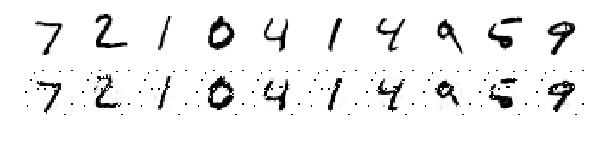

In [13]:
# library 가져오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data', one_hot=True)

# parameter 설정
learning_rate=0.01 		#최적학습률
training_epoch=20		#전체데이터를 학습할 총횟수
batch_size=100		#미니배치로 한번에 학습할 데이터의 개수
n_hidden=256			#은닉층의 뉴런개수
n_input=28*28			#입력값의 크기로 784

# model
X=tf.placeholder(tf.float32, [None, n_input])	#플레이스 홀더 설정
#인코더 설정
W_encode=tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode=tf.Variable(tf.random_normal([n_hidden]))
encoder=tf.nn.sigmoid(
		tf.add(tf.matmul(X, W_encode), b_encode))
#은닉층의 사이즈가 입력층보다 작다. 이러한 특징을 통하여 입력값을 압축하고 노이즈를 제거하면서 입력값의 특징을 찾아낼 수 있다.

#디코더 설정
W_decode=tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode=tf.Variable(tf.random_normal([n_input]))
decoder=tf.nn.sigmoid(
		tf.add(tf.matmul(encoder, W_decode), b_decode))

#오토인코더의 구조는 다음과 같게된다.


# cost
# 가중치들을 최적화하기 위한 손실함수를 만들도록 한다.
cost=tf.reduce_mean(tf.pow(X - decoder,2))

# optimize
#RMSPropOptimizer함수를 사용한 최적화 함수를 설정한다.
optimizer=tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# train
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

total_batch=int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
  total_cost=0
  for i in range(total_batch):
    batch_xs, batch_ys=mnist.train.next_batch(batch_size)
    _, cost_val=sess.run([optimizer, cost],feed_dict={X:batch_xs})
    total_cost+=cost_val
  print('Epoch:','%04d' % (epoch+1), 'Avg. cost=','{:.4f}'.format(total_cost/total_batch))
print('최적화 완료!')


# 결과확인
sample_size=10
samples=sess.run(decoder,
	feed_dict={X:mnist.test.images[:sample_size]})

fig, ax=plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
	ax[0][i].set_axis_off()
	ax[1][i].set_axis_off()
	ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
	ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
plt.show()
